# **Hand-Written Digits Classification using Artificial Neural Networks.**

### Objective:  To classify 28 x 28 pixel images of handwritten digits from 0 to 9. (MNIST dataset)
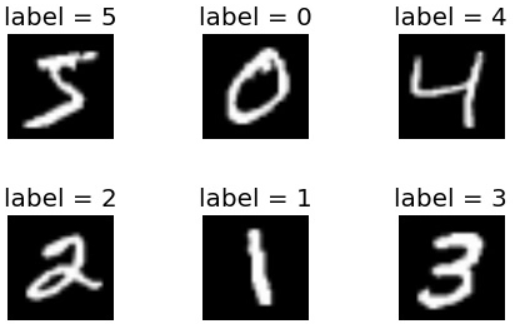

In [1]:
import numpy as np
import pandas as pd
import pickle
import gzip
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The MNIST dataset used here is 'mnist.pkl.gz' which is divided into training, validation and test data. 

In [2]:
# Unpacking the file and extracting the training, validation and test data.
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data  = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [3]:
training_data, validation_data, test_data = load_data()

In [4]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [5]:
training_data[0].shape

(50000, 784)

In [6]:
validation_data[0].shape

(10000, 784)

In [7]:
test_data[0].shape

(10000, 784)

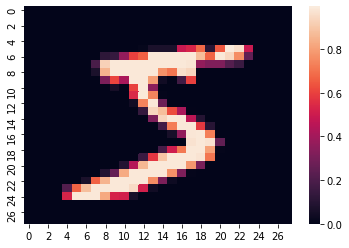

In [8]:
# Visualising the dataset:
index=0
sns.heatmap(pd.DataFrame(training_data[0][index].reshape(28,28)))
plt.show()

In [9]:
# Converting target variable into a one hot matrix
def one_hot(j):
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [10]:
# Sample test case
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
one_hot(data)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:])
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results).T
    
    validation_inputs = np.array(va_d[0][:])
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results).T
    
    test_inputs = np.array(te_d[0][:])
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results).T
    
    return (training_inputs, train_set_y, validation_inputs, validation_set_y)

In [12]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [13]:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (50000, 784)
train_set_y shape: (50000, 10)
test_set_x shape: (10000, 784)
test_set_y shape: (10000, 10)


In [14]:
# creating a neural network model:
nn_model = Sequential()
nn_model.add(Dense(31, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(20, activation = 'relu'))
nn_model.add(Dense(10, activation='softmax'))

In [15]:
# Compiling the model:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# fitting the model:
nn_model.fit(train_set_x, train_set_y, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 22s 854us/step - loss: 0.7838 - accuracy: 0.7499
Epoch 2/10
5000/5000 [==============================] - 4s 838us/step - loss: 0.3600 - accuracy: 0.8901
Epoch 3/10
5000/5000 [==============================] - 4s 860us/step - loss: 0.3248 - accuracy: 0.8991
Epoch 4/10
5000/5000 [==============================] - 4s 870us/step - loss: 0.2877 - accuracy: 0.9115
Epoch 5/10
5000/5000 [==============================] - 4s 871us/step - loss: 0.2766 - accuracy: 0.9125
Epoch 6/10
5000/5000 [==============================] - 4s 883us/step - loss: 0.2631 - accuracy: 0.9171
Epoch 7/10
5000/5000 [==============================] - 4s 859us/step - loss: 0.2539 - accuracy: 0.9208
Epoch 8/10
5000/5000 [==============================] - 4s 876us/step - loss: 0.2465 - accuracy: 0.9243
Epoch 9/10
5000/5000 [==============================] - 4s 887us/step - loss: 0.2407 - accuracy: 0.9259
Epoch 10/10
5000/5000 [==============================] - 4s 788

In [17]:
scores_train = nn_model.evaluate(train_set_x, train_set_y)
print(f'train accuracy = {scores_train[1]*100}')

1563/1563 [==============================] - 2s 630us/step - loss: 0.1112 - accuracy: 0.9656
train accuracy = 96.56400084495544


We can see that the model has ~ 97% accuracy on the training dataset.

In [18]:
# making predictions on the test dataset.
predictions = nn_model.predict(test_set_x)
predictions = np.argmax(predictions, axis = 1)
predictions

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

In [19]:
scores_test = nn_model.evaluate(test_set_x, test_set_y)
print(f'test accuracy = {scores_test[1]*100}')

313/313 [==============================] - 0s 617us/step - loss: 0.1396 - accuracy: 0.9590
test accuracy = 95.89999914169312


We can see that the model has ~96% accuracy on the training dataset.

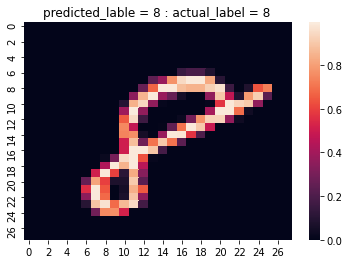

In [20]:
# Finally verifying the model on test dataset: [Index can be changed to verify the actual and predicted lables]
index=9999
plt.title('predicted_lable = {label[0]} : actual_label = {label[1]} '.format(label=(predictions[index], np.argmax(test_set_y, axis = 1)[index])))
sns.heatmap(pd.DataFrame(test_set_x[index].reshape(28,28)))
plt.show()

### Here the classification of the hand-written digits is acheived with a test accuracy of `96.3%`. Hence this Aritificial Neural Network model can be used to predict any hand written digits from 0-9.

## Now we clicked the image of our hand-written digit and tested it in our Neural Network model.

### Before we proceed for prediction we need to convert our jpeg image into 28*28 pixels and also the colours of the background and digit is swaped.

In [21]:
def image(image_location):
    test_image = cv2.imread(image_location, cv2.IMREAD_GRAYSCALE)

    # Preview sample image
    plt.figure(figsize=[10,10])
    plt.subplot(1,2,1)
    plt.imshow(test_image, cmap='gray')
    plt.title('Hand-written image')

    # Format Image
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    # Preview reformatted image
    plt.subplot(1,2,2)
    plt.imshow(img_resized, cmap='gray')
    plt.title('modefied image')
    plt.show()
    
    # reshaping into desired shape
    img_reshaped=img_resized.reshape(1,784)
    
    # Predicting from our model
    out=np.argmax(nn_model.predict(img_reshaped), axis = 1)
    print(f'predicted lable = {out[0]}')

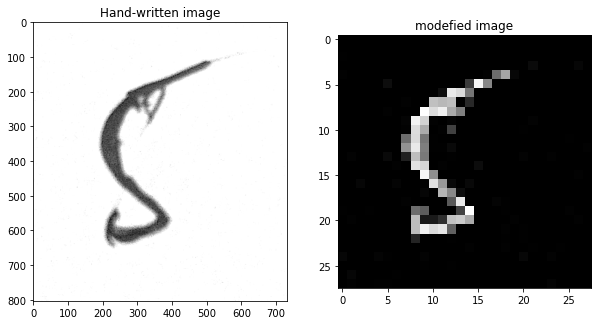

predicted lable = 5


In [22]:
file = r'C:\Users\prash\Downloads\five5.jpeg'
image(file)

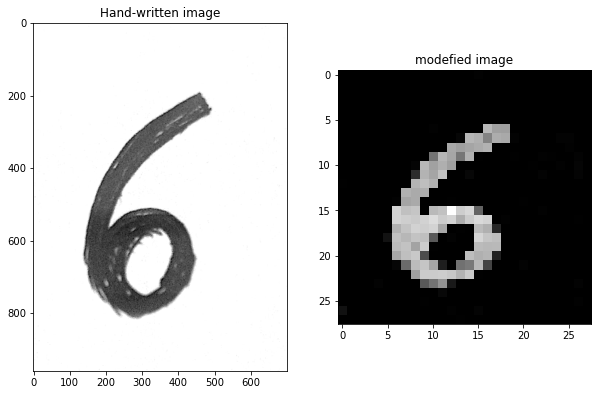

predicted lable = 6


In [23]:
file = r'C:\Users\prash\Downloads\six.jpeg'
image(file)

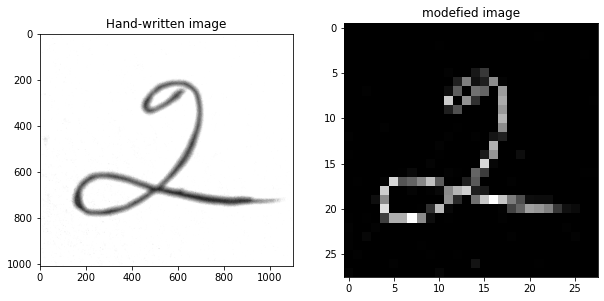

predicted lable = 2


In [24]:
file = r'C:\Users\prash\Downloads\two.jpeg'
image(file)